In [465]:
import seaborn as sns
# Plot the histogram thanks to the distplot function
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px
dd = pd.read_csv("INFY.csv")

date_dt=dd['Date'];
df=dd.copy();
df=df.set_index(pd.DatetimeIndex(date_dt))
df

Date       Open       High        Low      Close  Adj Close  \
Date                                                                            
2023-04-17  17-04-2023  15.070000  15.290000  15.050000  15.190000  14.794353   
2023-04-18  18-04-2023  15.170000  15.190000  14.940000  14.960000  14.570345   
2023-04-19  19-04-2023  14.830000  14.920000  14.760000  14.820000  14.433990   
2023-04-20  20-04-2023  14.820000  14.990000  14.790000  14.850000  14.463209   
2023-04-21  21-04-2023  14.910000  14.960000  14.840000  14.870000  14.482688   
...                ...        ...        ...        ...        ...        ...   
2024-10-04  10-04-2024  18.000000  18.080000  17.860001  18.000000  18.000000   
2024-11-04  11-04-2024  18.139999  18.139999  17.850000  17.940001  17.940001   
2024-12-04  12-04-2024  17.780001  17.860001  17.530001  17.719999  17.719999   
2024-04-15  15-04-2024  17.690001  17.709999  17.260000  17.270000  17.270000   
2024-04-16  16-04-2024  16.980000  17.190001  16.990000  17.094999  17.094999   

              Volume  
Date                  
2023-04-17  17173000  
2023-04-18  20768400  
2023-04-19  19107300  
2023-04-20  16901400  
2023-04-21   6908400  
...              ...  
2024-10-04  11553000  
2024-11-04  13389200  
2024-12-04  17657700  
2024-04-15  11374300  
2024-04-16   9181106  

[252 rows x 7 columns]

C:\Users\RAmsh\AppData\Local\Temp\ipykernel_17636\3089000428.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


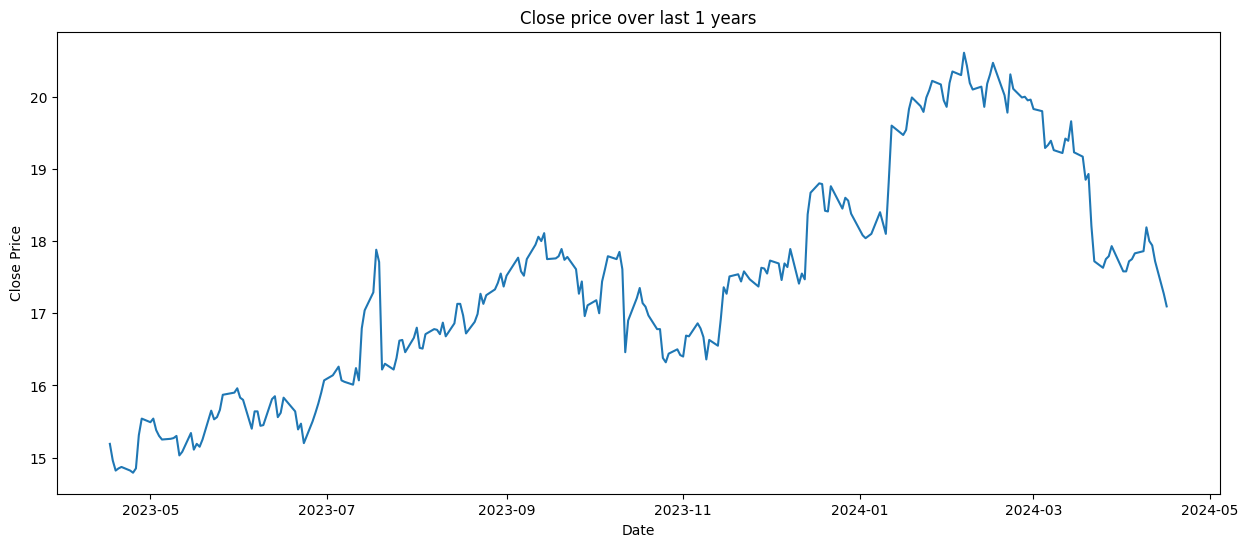

In [466]:
close_data=df["Close"]
df["Date"] = pd.to_datetime(df["Date"])

c1 = df[df["Date"].dt.year >= 2022]["Close"]
# c1
#df["Date"]
#
plt.figure(figsize=(15,6));
plt.plot(df["Date"], df["Close"]); # dd["Close"]
plt.title("Close price over last 1 years")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

daily_closing_prices=df['Close']

In [467]:
df['return'] = df['Close'].pct_change()

In [468]:
df

Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2023-04-17 2023-04-17  15.070000  15.290000  15.050000  15.190000  14.794353   
2023-04-18 2023-04-18  15.170000  15.190000  14.940000  14.960000  14.570345   
2023-04-19 2023-04-19  14.830000  14.920000  14.760000  14.820000  14.433990   
2023-04-20 2023-04-20  14.820000  14.990000  14.790000  14.850000  14.463209   
2023-04-21 2023-04-21  14.910000  14.960000  14.840000  14.870000  14.482688   
...               ...        ...        ...        ...        ...        ...   
2024-10-04 2024-04-10  18.000000  18.080000  17.860001  18.000000  18.000000   
2024-11-04 2024-04-11  18.139999  18.139999  17.850000  17.940001  17.940001   
2024-12-04 2024-04-12  17.780001  17.860001  17.530001  17.719999  17.719999   
2024-04-15 2024-04-15  17.690001  17.709999  17.260000  17.270000  17.270000   
2024-04-16 2024-04-16  16.980000  17.190001  16.990000  17.094999  17.094999   

              Volume    return  
Date                            
2023-04-17  17173000       NaN  
2023-04-18  20768400 -0.015142  
2023-04-19  19107300 -0.009358  
2023-04-20  16901400  0.002024  
2023-04-21   6908400  0.001347  
...              ...       ...  
2024-10-04  11553000 -0.010445  
2024-11-04  13389200 -0.003333  
2024-12-04  17657700 -0.012263  
2024-04-15  11374300 -0.025395  
2024-04-16   9181106 -0.010133  

[252 rows x 8 columns]

In [469]:
# Calculate daily returns
daily_returns = np.diff(daily_closing_prices) / daily_closing_prices[:-1]

# Calculate standard deviation of daily returns
std_dev = np.std(daily_returns, ddof=1)

trading_days_per_year = 252

# Annualize the standard deviation
annual_volatility = std_dev * np.sqrt(trading_days_per_year)

print("Estimated Annual Volatility:", annual_volatility)
sigma=annual_volatility

Estimated Annual Volatility: 0.2326152569913156


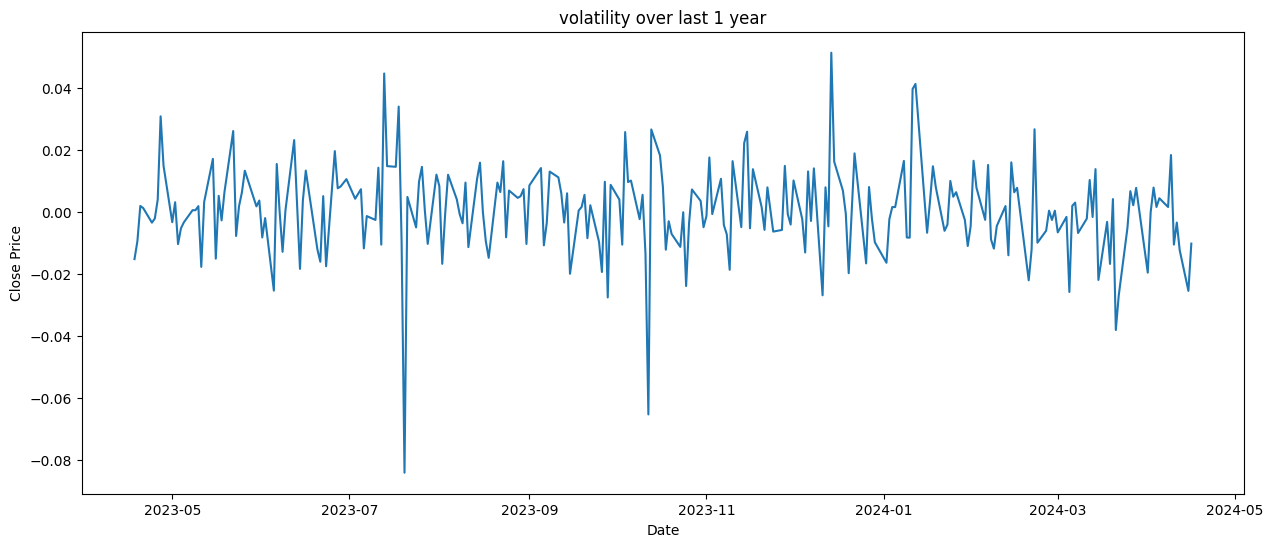

In [470]:
close_data=df["Close"]
df["Date"] = pd.to_datetime(df["Date"])

c1 = df[df["Date"].dt.year >= 2022]["Close"]
# c1
#df["Date"]
#
plt.figure(figsize=(15,6));
plt.plot(df["Date"], df["return"]); # dd["Close"]
plt.title("volatility over last 1 year")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

daily_closing_prices=df['Close']

In [471]:
# 4. Use 10 years’ US treasury rate as the rate of interest.
rf= 0.0467


#### Binomial

In [472]:
import numpy as np

def binomial_option_price(S, K, T, r, sigma, option_type='call', steps=1000):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Initialize stock price tree and option value tree
    stock_price = np.zeros((steps + 1, steps + 1))
    option_value = np.zeros((steps + 1, steps + 1))
    
    # Generate stock price tree
    for j in range(steps + 1):
        for i in range(j + 1):
            stock_price[i, j] = S * (u ** (j - i)) * (d ** i)
    
    # Calculate option value at maturity
    if option_type == 'call':
        option_value[:, steps] = np.maximum(stock_price[:, steps] - K, 0)
    else:
        option_value[:, steps] = np.maximum(K - stock_price[:, steps], 0)
    
    # Calculate option value at each node
    for j in range(steps - 1, -1, -1):
        for i in range(j + 1):
            option_value[i, j] = np.exp(-r * dt) * (p * option_value[i, j + 1] + (1 - p) * option_value[i + 1, j + 1])
    
    return option_value[0, 0]

# Example usage

# S is the current spot price of underlying stock
S = df['Adj Close'].iloc[-1]
S
#S = 12    # Current stock price
r = rf    # Risk-free interest rate
sigma = 0.2326 # Volatility
steps = 1000 # Number of steps in the binomial tree


# Different strike prices and times to maturity
strike_prices = [13,15,18,20]
K=17
maturities = [0.5, 1,1.5,2]
Stp=[2,8, 10,100,1000]


call_prices_data = {step: [] for step in range(len(strike_prices))}
put_prices_data = {step: [] for step in  range(len(strike_prices))}
T=1
for i in range(len(strike_prices)):
    print(f"Strike Price: {strike_prices[i]}, Maturity: {T}")
    for steps in Stp:
 
         call_price = binomial_option_price(S, strike_prices[i],T, r, sigma, option_type='call', steps=steps)
         put_price = binomial_option_price(S, strike_prices[i], T, r, sigma, option_type='put', steps=steps)
         print(f"Steps:{steps}, Binomial Call Option Price: {call_price}, Binomial Put Option Price: {put_price}")
       
         call_prices_data[i].append(call_price)
         put_prices_data[i].append(put_price)
    

Strike Price: 13, Maturity: 1
Steps:2, Binomial Call Option Price: 4.83479776415733, Binomial Put Option Price: 0.14665643187970376
Steps:8, Binomial Call Option Price: 4.828152035187084, Binomial Put Option Price: 0.1400107029094415
Steps:10, Binomial Call Option Price: 4.815425487985952, Binomial Put Option Price: 0.127284155708335
Steps:100, Binomial Call Option Price: 4.817228589474179, Binomial Put Option Price: 0.12908725719667713
Steps:1000, Binomial Call Option Price: 4.817932239730405, Binomial Put Option Price: 0.1297909074541531
Strike Price: 15, Maturity: 1
Steps:2, Binomial Call Option Price: 3.346848226507002, Binomial Put Option Price: 0.5674542277251238
Steps:8, Binomial Call Option Price: 3.2568397088133567, Binomial Put Option Price: 0.47744571003146347
Steps:10, Binomial Call Option Price: 3.2394619094352417, Binomial Put Option Price: 0.46006791065337593
Steps:100, Binomial Call Option Price: 3.244872092549873, Binomial Put Option Price: 0.4654780937681127
Steps:100

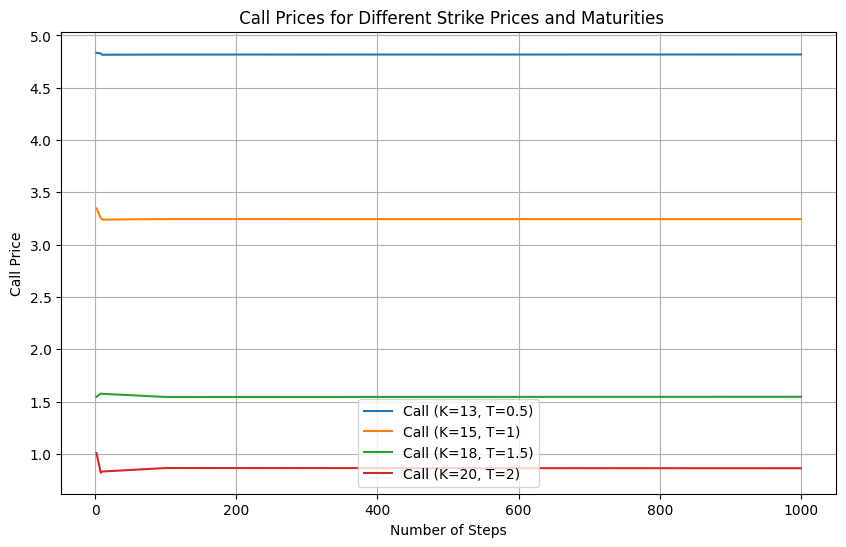

In [473]:
plt.figure(figsize=(10, 6))

for i in range(len(strike_prices)):
    plt.plot(Stp, call_prices_data[i], label=f'Call (K={strike_prices[i]}, T={maturities[i]})')

plt.xlabel('Number of Steps')
plt.ylabel('Call Price')
plt.title(' Call Prices for Different Strike Prices and Maturities')
plt.legend()
plt.grid(True)
plt.show()

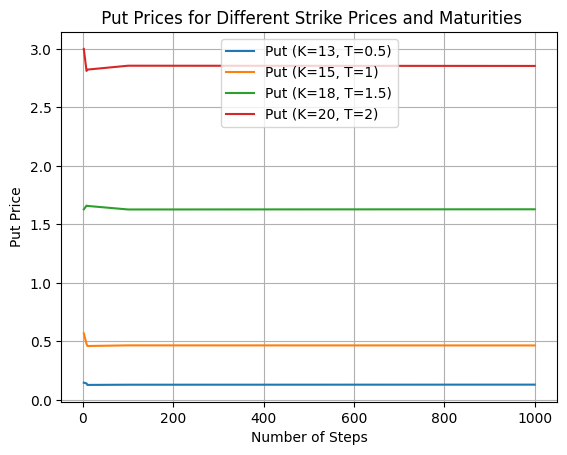

In [474]:


for i in range(len(strike_prices)):
    plt.plot(Stp, put_prices_data[i], label=f'Put (K={strike_prices[i]}, T={maturities[i]})')

plt.xlabel('Number of Steps')
plt.ylabel('Put Price')
plt.title(' Put Prices for Different Strike Prices and Maturities')
plt.legend()
plt.grid(True)
plt.show()
    

## Time of maturity as 2

In [475]:
call_prices_data2 = [[] for _ in range(len(strike_prices))]
put_prices_data2 = [[] for _ in range(len(strike_prices))]
T = 2

for i in range(len(strike_prices)):
    print(f"Strike Price: {strike_prices[i]}, Maturity: {T}")
    for steps in Stp:
        call_price = binomial_option_price(S, strike_prices[i], T, r, sigma, option_type='call', steps=steps)
        put_price = binomial_option_price(S, strike_prices[i], T, r, sigma, option_type='put', steps=steps)
        print(f"Steps:{steps}, Binomial Call Option Price: {call_price}, Binomial Put Option Price: {put_price}")
        call_prices_data2[i].append(call_price)
        put_prices_data2[i].append(put_price)



Strike Price: 13, Maturity: 2
Steps:2, Binomial Call Option Price: 5.683122305356278, Binomial Put Option Price: 0.42890155051946555
Steps:8, Binomial Call Option Price: 5.556954964687912, Binomial Put Option Price: 0.3027342098511097
Steps:10, Binomial Call Option Price: 5.572931123477925, Binomial Put Option Price: 0.31871036864112057
Steps:100, Binomial Call Option Price: 5.562012834966812, Binomial Put Option Price: 0.3077920801301028


In [ ]:
call_prices_data[0]

[4.83479776415733,
 4.828152035187084,
 4.815425487985952,
 4.817228589474179,
 4.817932239730405]

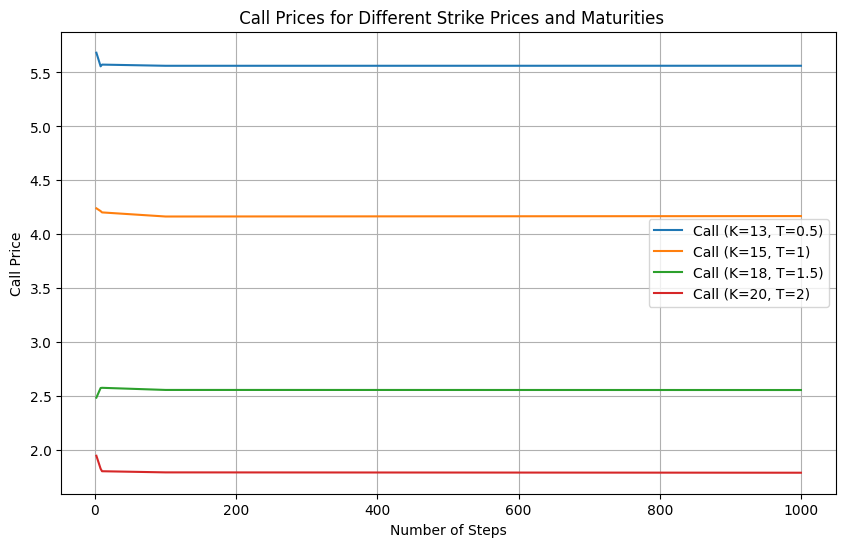

In [ ]:
plt.figure(figsize=(10, 6))

for i in range(len(strike_prices)):
    plt.plot(Stp, call_prices_data2[i], label=f'Call (K={strike_prices[i]}, T={maturities[i]})')

plt.xlabel('Number of Steps')
plt.ylabel('Call Price')
plt.title(' Call Prices for Different Strike Prices and Maturities')
plt.legend()
plt.grid(True)
plt.show()

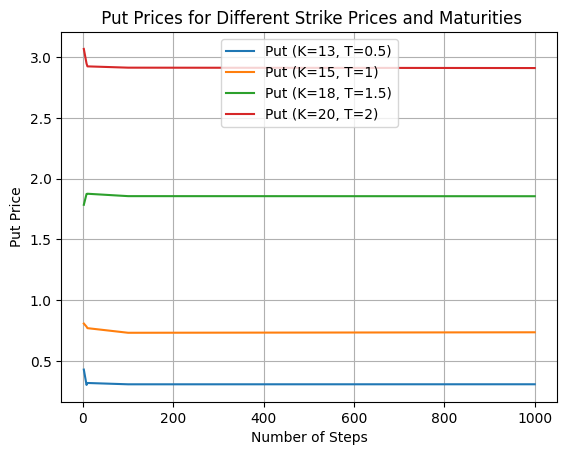

In [ ]:


for i in range(len(strike_prices)):
    plt.plot(Stp, put_prices_data2[i], label=f'Put (K={strike_prices[i]}, T={maturities[i]})')

plt.xlabel('Number of Steps')
plt.ylabel('Put Price')
plt.title(' Put Prices for Different Strike Prices and Maturities')
plt.legend()
plt.grid(True)
plt.show()
    

### Black Scholes

In [ ]:
from scipy.stats import norm

def black_scholes_option_price(S, K, T, r, sigma, option_type='call'):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':

        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        
        #option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        call_price = black_scholes_option_price(S, K, T, r, sigma,option_type='call')
        option_price = call_price - S + K * np.exp(-r * T)
        #option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
    return option_price

call_prices_bs2 = {step: [] for step in range(len(strike_prices))}
put_prices_bs2 = {step: [] for step in  range(len(strike_prices))}
# Example usage
call_bs2=[]
put_bs2=[]
T=2
for i in range(len(strike_prices)):
    #for j in range(len(strike_prices)):
        print(f"Strike price :{strike_prices[i]}, Maturities : {T}")
        #for steps in Stp:
        call_price_bs = black_scholes_option_price(S, strike_prices[i],T, r, sigma, option_type='call')
        put_price_bs = black_scholes_option_price(S, strike_prices[i], T, r, sigma, option_type='put')
        call_bs2.append(call_price_bs)
        put_bs2.append(put_price_bs)
        
        call_prices_bs2[i].append(call_bs2)
        put_prices_bs2[i].append(put_bs2)
        print(f"Strike Price: {strike_prices[i]}, Maturity: {T}, Black-Scholes Call Option Price: {call_price_bs}, Black-Scholes Put Option Price: {put_price_bs}")


Strike price :13, Maturities : 2
Strike Price: 13, Maturity: 2, Black-Scholes Call Option Price: 5.56233045373348, Black-Scholes Put Option Price: 0.30810969889666673
Strike price :15, Maturities : 2
Strike Price: 15, Maturity: 2, Black-Scholes Call Option Price: 4.168177326770465, Black-Scholes Put Option Price: 0.7356147634972192
Strike price :18, Maturities : 2
Strike Price: 18, Maturity: 2, Black-Scholes Call Option Price: 2.555108361388876, Black-Scholes Put Option Price: 1.8550330854609811
Strike price :20, Maturities : 2
Strike Price: 20, Maturity: 2, Black-Scholes Call Option Price: 1.7882856322963363, Black-Scholes Put Option Price: 2.9098685479320103


In [ ]:

call_prices_bs = {step: [] for step in range(len(strike_prices))}
put_prices_bs = {step: [] for step in  range(len(strike_prices))}
# Example usage
call_bs=[]
put_bs=[]
T=1
for i in range(len(strike_prices)):
    #for j in range(len(strike_prices)):
        print(f"Strike price :{strike_prices[i]}, Maturities : {T}")
        #for steps in Stp:
        call_price_bs = black_scholes_option_price(S, strike_prices[i],T, r, sigma, option_type='call')
        put_price_bs = black_scholes_option_price(S, strike_prices[i], T, r, sigma, option_type='put')
        call_bs.append(call_price_bs)
        put_bs.append(put_price_bs)
        
        call_prices_bs[i].append(call_bs)
        put_prices_bs[i].append(put_bs)
        print(f"Strike Price: {strike_prices[i]}, Maturity: {T}, Black-Scholes Call Option Price: {call_price_bs}, Black-Scholes Put Option Price: {put_price_bs}")


Strike price :13, Maturities : 1
Strike Price: 13, Maturity: 1, Black-Scholes Call Option Price: 4.817859724883023, Black-Scholes Put Option Price: 0.12971839260539397
Strike price :15, Maturities : 1
Strike Price: 15, Maturity: 1, Black-Scholes Call Option Price: 3.244349081273599, Black-Scholes Put Option Price: 0.4649550824917199
Strike price :18, Maturities : 1
Strike Price: 18, Maturity: 1, Black-Scholes Call Option Price: 1.5451050195783207, Black-Scholes Put Option Price: 1.6288320210400666
Strike price :20, Maturities : 1
Strike Price: 20, Maturity: 1, Black-Scholes Call Option Price: 0.8623791765422766, Black-Scholes Put Option Price: 2.8548535114997726


In [ ]:
call_prices_bs2

{0: [[5.56233045373348,
   4.168177326770465,
   2.555108361388876,
   1.7882856322963363]],
 1: [[5.56233045373348,
   4.168177326770465,
   2.555108361388876,
   1.7882856322963363]],
 2: [[5.56233045373348,
   4.168177326770465,
   2.555108361388876,
   1.7882856322963363]],
 3: [[5.56233045373348,
   4.168177326770465,
   2.555108361388876,
   1.7882856322963363]]}

### Comparison plot

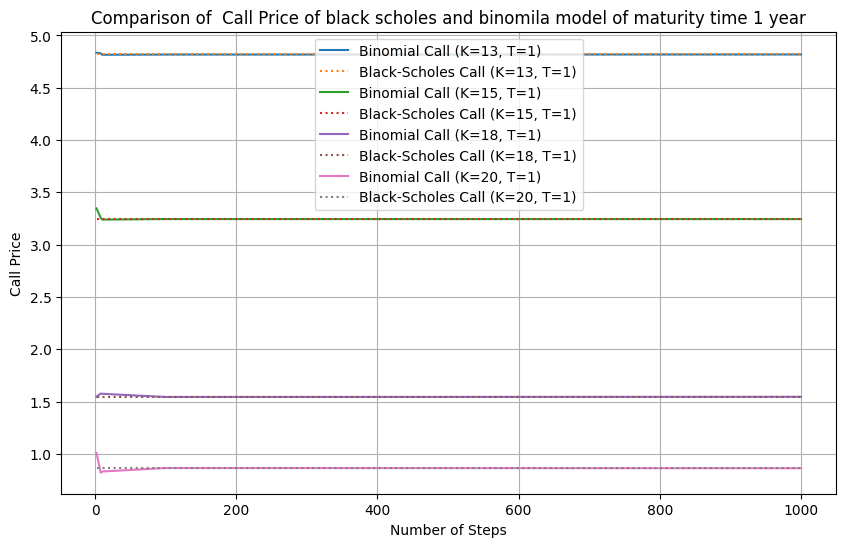

In [ ]:
plt.figure(figsize=(10, 6))

T=1
for i in range(len(strike_prices)):
    # Plot binomial call option prices
    plt.plot(Stp, call_prices_data[i], label=f'Binomial Call (K={strike_prices[i]}, T={T})')
    plt.plot(Stp, [call_bs[i]] * len(Stp), linestyle=':', label=f'Black-Scholes Call (K={strike_prices[i]}, T={T})')
plt.xlabel('Number of Steps')
plt.ylabel('Call Price')
plt.title('Comparison of  Call Price of black scholes and binomila model of maturity time 1 year')
plt.legend()
plt.grid(True)
plt.show()


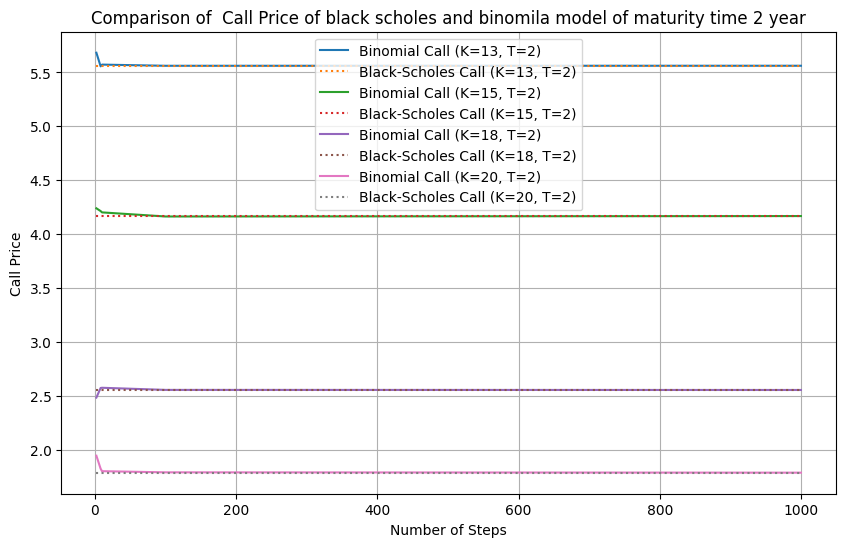

In [ ]:
plt.figure(figsize=(10, 6))

T=2
for i in range(len(strike_prices)):
    # Plot binomial call option prices
    plt.plot(Stp, call_prices_data2[i], label=f'Binomial Call (K={strike_prices[i]}, T={T})')
    # Plot Black-Scholes call option prices
    plt.plot(Stp, [call_bs2[i]] * len(Stp), linestyle=':', label=f'Black-Scholes Call (K={strike_prices[i]}, T={T})')
    # Plot Black-Scholes put option prices

plt.xlabel('Number of Steps')
plt.ylabel('Call Price')
plt.title('Comparison of  Call Price of black scholes and binomila model of maturity time 2 year')
plt.legend()
plt.grid(True)
plt.show()


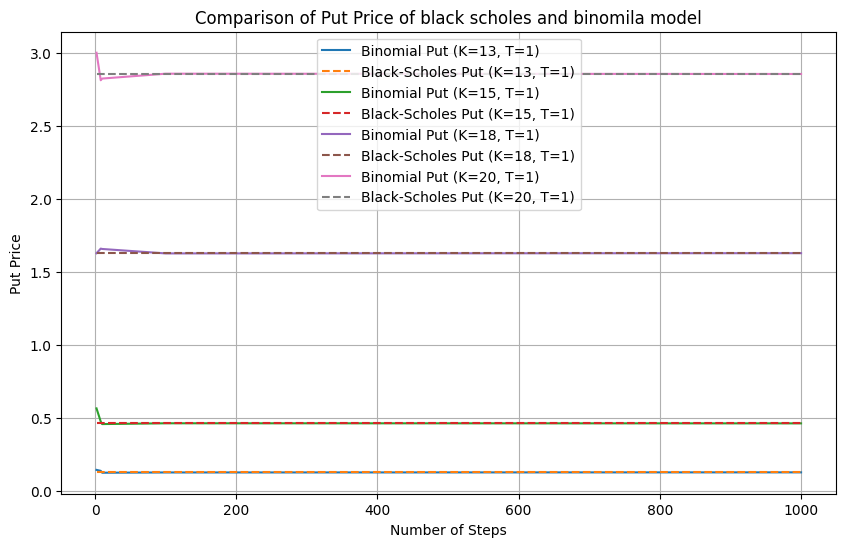

In [ ]:
plt.figure(figsize=(10, 6))
T=1
for i in range(len(strike_prices)):
    plt.plot(Stp, put_prices_data[i], label=f'Binomial Put (K={strike_prices[i]}, T={T})')
    plt.plot(Stp, [put_bs[i]] * len(Stp), linestyle='--', label=f'Black-Scholes Put (K={strike_prices[i]}, T={T})')

plt.xlabel('Number of Steps')
plt.ylabel('Put Price')
plt.title('Comparison of Put Price of black scholes and binomila model')
plt.legend()
plt.grid(True)
plt.show()


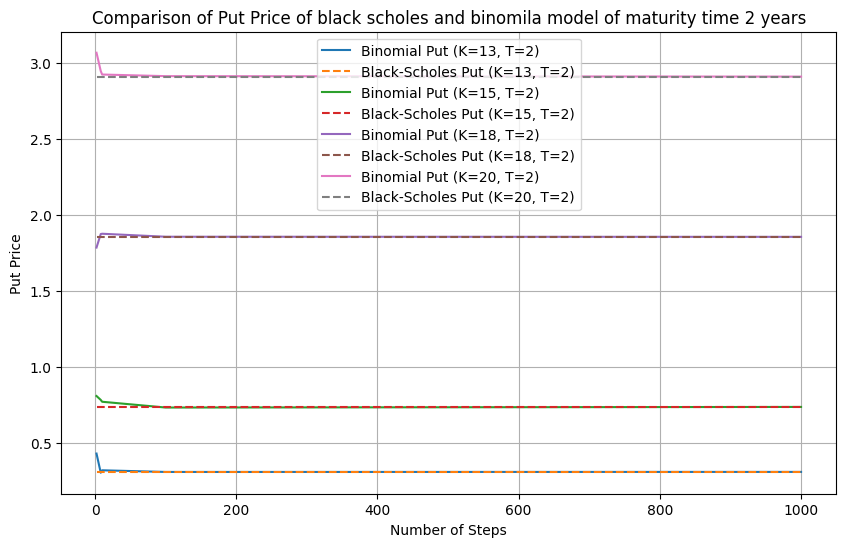

In [ ]:
plt.figure(figsize=(10, 6))
T=2
for i in range(len(strike_prices)):
    plt.plot(Stp, put_prices_data2[i], label=f'Binomial Put (K={strike_prices[i]}, T={T})')
    plt.plot(Stp, [put_bs2[i]] * len(Stp), linestyle='--', label=f'Black-Scholes Put (K={strike_prices[i]}, T={T})')

plt.xlabel('Number of Steps')
plt.ylabel('Put Price')
plt.title('Comparison of Put Price of black scholes and binomila model of maturity time 2 years')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# d1 is the probability of receiving the stock at expiration 
def d11(S, X, T, r, sigma):
    return (np.log(S/X) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))

# d2 is the risk-adjusted probability that the option will be exercised
def d21(d1, T, sigma):
    return d1 - sigma * np.sqrt(T)

# Black-Scholes European option pricing formula    
def black_scholes(S, X, T, r, sigma, option_type):
    global d_one, d_two
    d_one = d11(S, X, T, r, sigma)
    d_two = d21(d_one, T, sigma)
    if option_type == 'call':
        return S * norm.cdf(d_one) - np.exp(-r * T) * X * norm.cdf(d_two)
    elif option_type == 'put':
        return -(S * norm.cdf(-d_one) - np.exp(-r * T) * X * norm.cdf(-d_two))
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

In [ ]:
T=1
# lets take strike price as 18
K=18
rf
sigma

0.2326

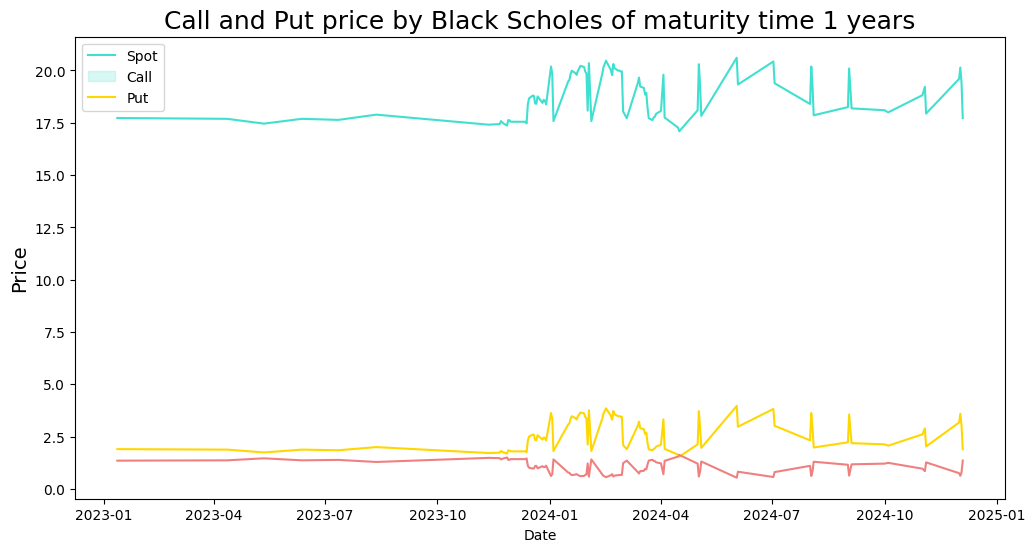

In [ ]:

# Last 100 spot prices
ps = df['Close'][-100:]

# Initialize the European put option values array
call_option_values = np.zeros(ps.size)
put_option_values = np.zeros(ps.size)
T=1
# Iterate through spot prices and compute the option values
for i,S in enumerate(ps.values):
    call_option_values[i] = black_scholes(S = S, X = K, T = T, r = r, sigma = sigma, option_type = 'call')
    put_option_values[i] = black_scholes(S = S, X = K, T = T, r = r, sigma = sigma, option_type = 'put')

options_values=pd.DataFrame({'spot_price':ps, 'call_option_value':call_option_values, 'put_option_value':put_option_values})

plt.figure(figsize=(12,6))
sns.lineplot(data=options_values['spot_price'], color='turquoise')
sns.lineplot(data=options_values['call_option_value'], color='gold')
sns.lineplot(data=options_values['put_option_value'], color='lightcoral')
plt.ylabel('Price', fontsize=14)
plt.title('Call and Put price by Black Scholes of maturity time 1 years', fontsize=18)
plt.legend(labels=['Spot','Call','Put'])

## Delta neutral protocol

In [ ]:
pf=df['Adj Close'][-100:]
pf

Date
2023-11-21    17.440001
2023-11-22    17.580000
2023-11-24    17.469999
2023-11-27    17.370001
2023-11-28    17.629999
                ...    
2024-10-04    18.000000
2024-11-04    17.940001
2024-12-04    17.719999
2024-04-15    17.270000
2024-04-16    17.094999
Name: Adj Close, Length: 100, dtype: float64

In [ ]:
# 4. Use 10 years’ US treasury rate as the rate of interest.
rf= 0.0467
# Define parameters
S=17
# # Different strike prices and times to maturity
strike_prices = [11, 15, 20, 30]
maturities = [0.5, 1, 1.2, 1.5]
#S=25
#strike_prices = [10, 15, 20, 40,100]
#maturities = [0.5, 1,  1.5,3,5]
#
# Calculate option prices and delta for both call and put options
call_deltas = []
put_deltas = []
call_prices = []
put_prices = []

for K in strike_prices:
    for T in maturities:
        call_price = black_scholes_option_price(S, K, T, r, sigma, option_type='call')
        put_price = black_scholes_option_price(S, K, T, r, sigma, option_type='put')
        
        d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
        call_delta = norm.cdf(d1)
        put_delta = norm.cdf(d1) - 1
        
        call_prices.append(call_price)
        put_prices.append(put_price)
        call_deltas.append(call_delta)
        put_deltas.append(put_delta)
        
# Calculate delta-neutral portfolio
portfolio = pd.DataFrame({'Strike Price ': np.repeat(strike_prices, len(strike_prices)), 'Maturity': maturities * len(maturities),
                          'Call Delta': call_deltas, 'Put Delta': put_deltas, 'Call Price': call_prices, 'Put Price': put_prices})

portfolio['Call Weight'] = 0.5
portfolio['Put Weight'] = 0.5

# Calculate total delta of the portfolio
portfolio['Total Delta'] =  portfolio['Call Delta']  + portfolio['Put Delta']
#portfolio['Total Delta'] = portfolio['Call Weight'] * portfolio['Call Delta'] + portfolio['Put Weight'] * portfolio['Put Delta']

portfolio['Underlying Quantity'] = -portfolio['Total Delta'] * S
total_quantity = portfolio['Underlying Quantity'].sum()

print("Sum of Underlying Quantity column:", total_quantity)
print(portfolio)
pd1=pd.DataFrame(portfolio)


Sum of Underlying Quantity column: -28.24129923966671
    Strike Price   Maturity  Call Delta  Put Delta  Call Price  Put Price  \
0              11       0.5    0.999540  -0.000460    6.254175   0.000301   
1              11       1.0    0.993965  -0.006035    6.508911   0.007022   
2              11       1.2    0.990671  -0.009329    6.612022   0.012536   
3              11       1.5    0.985579  -0.014421    6.767192   0.023011   
4              15       0.5    0.868826  -0.131174    2.514798   0.168606   
5              15       1.0    0.831300  -0.168700    3.020786   0.336391   
6              15       1.2    0.825523  -0.174477    3.205867   0.388386   
7              15       1.5    0.821064  -0.178936    3.469232   0.454440   
8              20       0.5    0.180526  -0.819474    0.220982   2.759392   
9              20       1.0    0.315936  -0.684064    0.626926   2.714399   
10             20       1.2    0.353286  -0.646714    0.791669   2.701695   
11             20     

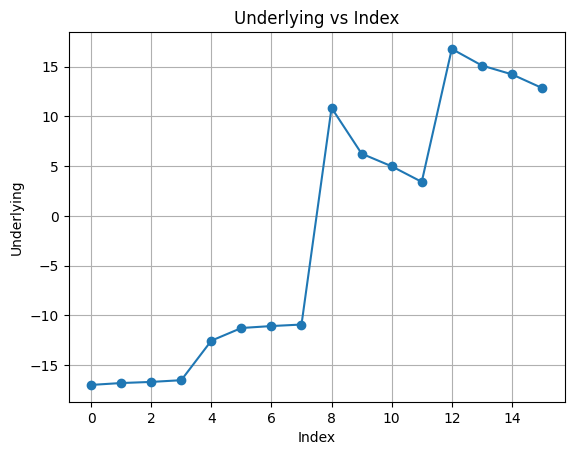

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pd1 is your DataFrame containing the provided data

# Plotting 'Underlying' against the index
plt.plot(pd1.index, pd1['Underlying Quantity'], marker='o', linestyle='-')
plt.title('Underlying vs Index')
plt.xlabel('Index')
plt.ylabel('Underlying')
plt.grid(True)
plt.show()


## Implied volatility

In [ ]:
strike_prices

[11, 15, 20, 30]

In [ ]:
S=17.09
print (S,K)
S=17.09
X=K

17.09 30


In [ ]:
sigma=0.2

In [ ]:
from scipy.optimize import fmin

def call_implied_volatility(Price, S, X, T, r):
    sigma=0.001
    while sigma < 1:
        Price_implied = black_scholes(S=S, X=X, T=T, r=r, sigma=sigma, option_type='call')
        if Price-(Price_implied) < 0.001:
            return sigma
        sigma += 0.001
    return "Not Found"

def put_implied_volatility(Price, S, X, T, r):
    sigma=0.001
    while sigma < 1:
        Price_implied = black_scholes(S=S, X=X, T=T, r=r, sigma=sigma, option_type='put')
        if Price-(Price_implied) < 0.001:
            return sigma
        sigma += 0.001
    return "Not Found"

In [ ]:
S

17.09

In [ ]:
strike_prices=[8,11,13, 15,18 ,20, 30]

In [ ]:
last_price = [10,7.9, 4.90, 1.50, 0.05,0.03, 0.03]
implied_volatilities = []

for i in range(len(strike_prices)):
    implied_volatility_percent = round(100 * call_implied_volatility(last_price[i], S, strike_prices[i], T, r), 2)
    implied_volatilities.append(implied_volatility_percent)

print("Implied Volatilities call option:", implied_volatilities)


Implied Volatilities call option: [54.3, 53.9, 0.1, 0.1, 0.1, 4.7, 18.8]


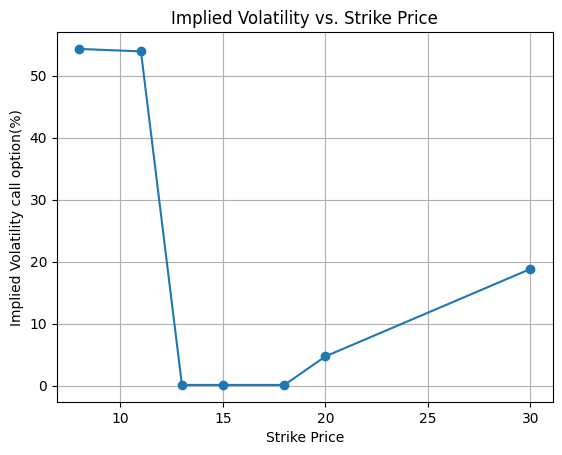

In [ ]:

plt.plot(strike_prices, implied_volatilities, marker='o', linestyle='-')
plt.title('Implied Volatility vs. Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility call option(%)')
plt.grid(True)
plt.show()

In [ ]:
last_price=[0.01,0.04,0.03,0.19,3.10,3.29]
strike_prices=[8,13, 15,17 ,20,22]
implied_volatilities2 = []

for i in range(len(strike_prices)):
    implied_volatility = put_implied_volatility(last_price[i], S, strike_prices[i], T, r)
    if implied_volatility is not None:
        implied_volatility_percent = round(100 * implied_volatility, 2)
    else:
        implied_volatility_percent = None
    implied_volatilities2.append(implied_volatility_percent)

print("Implied Volatilities put option:", implied_volatilities2)


Implied Volatilities put option: [27.6, 15.4, 9.2, 7.5, 25.2, 0.1]


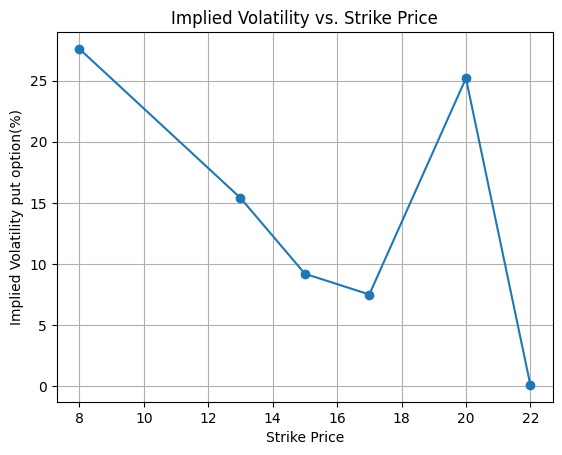

In [ ]:

plt.plot(strike_prices, implied_volatilities2, marker='o', linestyle='-')
plt.title('Implied Volatility vs. Strike Price')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility put option(%)')
plt.grid(True)
plt.show()